In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from rasterio import rasterio
from skimage.draw import polygon


In [3]:
dataset_path = "../data/dataset/"

!ls $dataset_path

binary_mask.png		sentinel2_2019_2.tif  sentinel2_2019_9.tif
elevation.tif		sentinel2_2019_3.tif  test_mask.png
gc_potential.tif	sentinel2_2019_4.tif  train_mask.png
ma_potential.tif	sentinel2_2019_5.tif  vit_potential.tif
pixels_to_stations.npy	sentinel2_2019_6.tif  weather_data.csv
sentinel2_2019_10.tif	sentinel2_2019_7.tif
sentinel2_2019_1.tif	sentinel2_2019_8.tif


/home/melsakka/Projects/agri-potential-dataset/agri_venv/lib/python3.10/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (120560400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


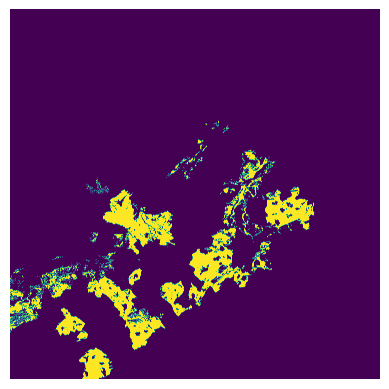

In [4]:
binary_mask = np.array(Image.open(dataset_path+"binary_mask.png"))
plt.imshow(binary_mask)
plt.axis("off")
plt.show()


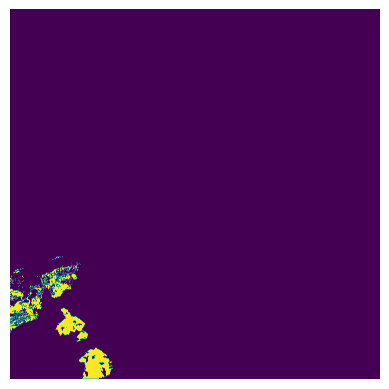

In [ ]:
up, down, left, right = 3321, 10979, 0, 9401
poly_coords = [(0, 6723),(2132, 6723),(2162, 7585),(2013, 8446),(3707, 10972),(0, 10972)]
poly_rows = [pt[1] for pt in poly_coords]
poly_cols = [pt[0] for pt in poly_coords]
poly_mask = np.zeros(binary_mask.shape, dtype=bool)
rr, cc = polygon(poly_rows, poly_cols, shape=binary_mask.shape)
poly_mask[rr, cc] = True

selection = (binary_mask == True) & poly_mask
plt.imshow(selection)
plt.axis("off")
plt.show()